# Exploratory Data Analysis

In [1]:

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
warnings.filterwarnings('ignore')

from csf.data.studies import CSFStudies
from csf.data.scans import CSFScan

In [2]:
%matplotlib inline
# Seaborn
sns.set_palette("Blues_r")
sns.set_style("whitegrid")
FIGSIZE = (12,8)
DARKBLUE = "#1C3879"
LIGHTBLUE = "steelblue"
# Pandas
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 20)
pd.set_option("display.max_colwidth", 100)
# Directories and Filepaths
TRAIN_IMAGES_DIR = "data/raw/train_images"
TEST_IMAGES_DIR = "data/raw/test_images"
SEGMENTATIONS_DIR = "data/raw/segmentations"
TRAINING_METADATA_FILEPATH = "data/raw/train.csv"
TEST_METADATA_FILEPATH = "data/raw/test.csv"
TRAIN_BOUNDING_BOXES_FILEPATH = "data/raw/train_bounding_boxes.csv"


## Training Metadata

In [3]:
studies = CSFStudies(filepath=TRAINING_METADATA_FILEPATH)

In [4]:
print("There are {} patients in the dataset, {} or {} percent of which have been diagnosed as having at least one cervical spine fracture.".format(studies.n_patients, studies.n_patients_with_fracture, studies.p_patients_with_fracture))

There are 2019 patients in the dataset, 961 or 47.6 percent of which have been diagnosed as having at least one cervical spine fracture.


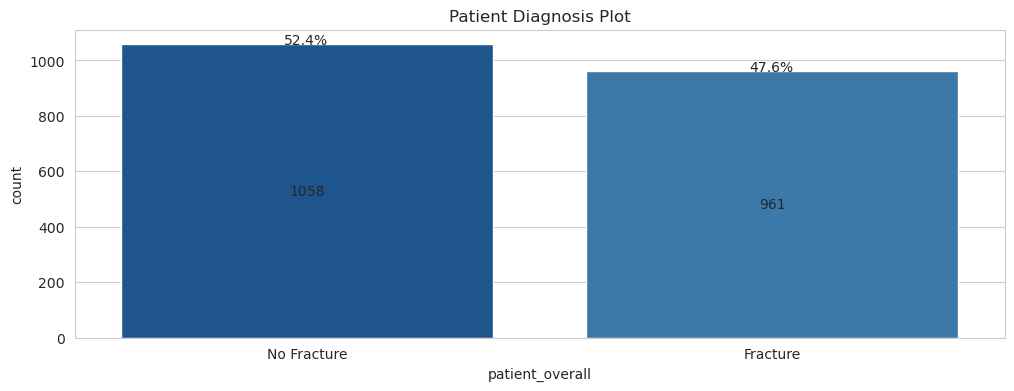

In [5]:
studies.patient_diagnoses_plot(figsize=(12,4))


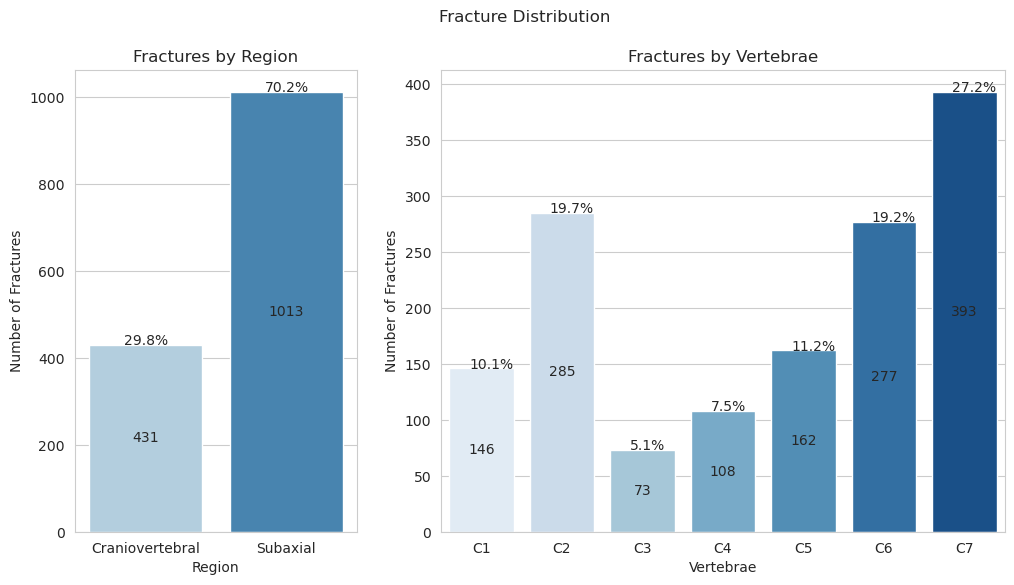

In [6]:
studies.fractures_plot()

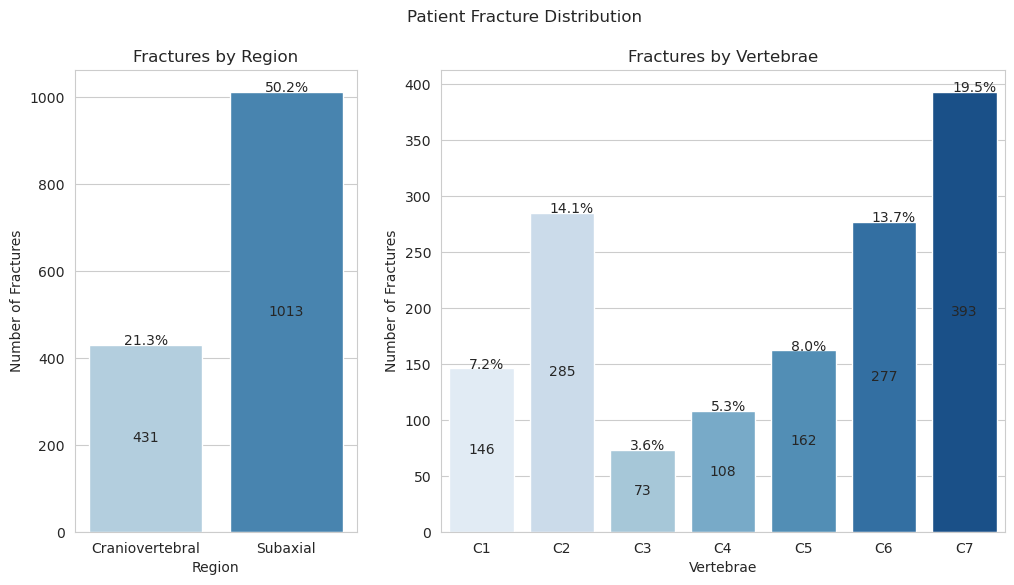

In [7]:
studies.patient_fractures_plot()

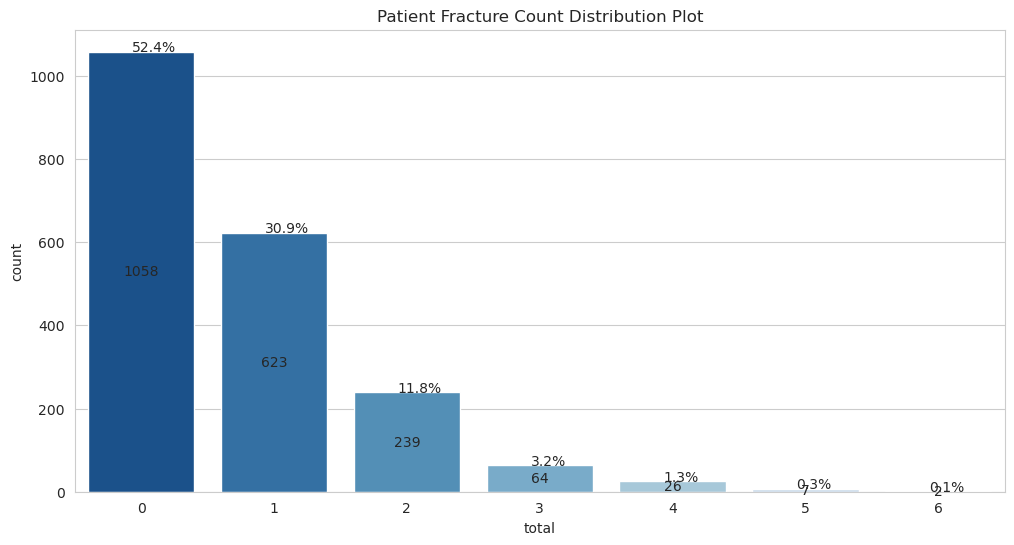

In [8]:
studies.patient_fracture_count_plot()

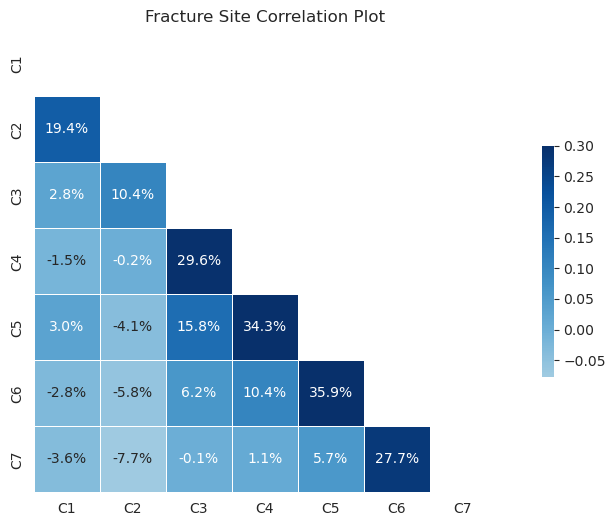

In [9]:
studies.fracture_correlation_plot()

### Scans
We'll evaluate scans with varying numbers of fractures. 
#### Scan with 0 Fractures

INFO:csf.data.scans:Loading slices for 1.2.826.0.1.3680043.25772
INFO:csf.data.scans:649 Slices Loaded


(512, 512)


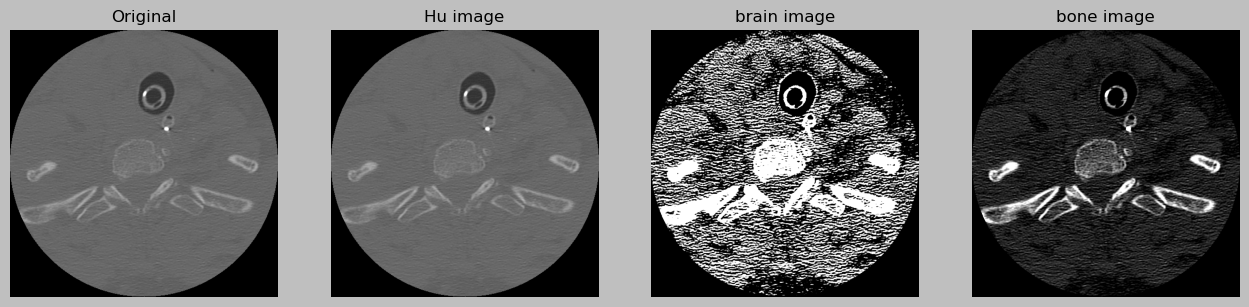

In [16]:
study = studies.get_sample_study_by_fracture_count(n=6)
scan = CSFScan(study=study)
# Get random slice
slice = scan.get_slice()
slice.plot_slice()